# League of Legends Matchmaking Notebook
Interim project for the subject of Data Structures in Universidad Anáhuac Querétaro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from classes import *
from IPython.display import Image

## Solution Description

### Class Player
Class that represents a League of Legends player. This function contains the statistics for a player and the function to calculate his MMR.

In [2]:
p1 = Player('pinguinodelanasa', 150, 55, 'Bronze', 1, True, 'adc', 'jg')
p2 = Player('Charls Alonso', 146, 50, 'Bronze', 2, False, 'sup', 'top')
p3 = Player('Johiliwisky18', 98, 58, 'Silver', 3, True, 'jg', 'mid')
p4 = Player('nigaalan', 159, 56, 'Gold', 4, True, 'top', 'jg')
p5 = Player('Osiris', 365, 60, 'Gold', 1, True, 'mid', 'adc')
print(p1)


pinguinodelanasa
Bronze 1
Level 150
Win Rate: 55%
Primary lane: adc
Secondary lane: jg


### Class Team
Class that represents a team of five players. One of each position: top, jungle, mid, adc and support.

In [3]:
t1 = Team(1)
t2 = Team(2)
t1.top = p4
t1.jg = p3
t1.mid = p5
t1.adc = p1
t1.sup = p2
t2.top = p4
t2.jg = p3
t2.mid = p5
t2.adc = p1
t2.sup = p2
print(t1)


top: nigaalan
jg: Johiliwisky18
mid: Osiris
adc: pinguinodelanasa
sup: Charls Alonso


### Class Match
Class that represents a match between two teams. These are red and blue team, they should have almost the same MMR average.

In [4]:
m = Match(1, t1, t1)
print(m)


Red Team
Average MMR: 1248.176
top: nigaalan
jg: Johiliwisky18
mid: Osiris
adc: pinguinodelanasa
sup: Charls Alonso

Blue Team
Average MMR: 1248.176
top: nigaalan
jg: Johiliwisky18
mid: Osiris
adc: pinguinodelanasa
sup: Charls Alonso


### Class Queue
Class that is the linked list where the players are added to wait for a match

In [5]:
q1 = Queue('Silver')
q1.insert_end(p1)
q1.insert_end(p2)
q1.insert_end(p3)
q1.insert_end(p4)
q1.insert_end(p5)
q1.print_list()


pinguinodelanasa
Bronze 1
Level 150
Win Rate: 55%
Primary lane: adc
Secondary lane: jg

Charls Alonso
Bronze 2
Level 146
Win Rate: 50%
Primary lane: sup
Secondary lane: top

Johiliwisky18
Silver 3
Level 98
Win Rate: 58%
Primary lane: jg
Secondary lane: mid

nigaalan
Gold 4
Level 159
Win Rate: 56%
Primary lane: top
Secondary lane: jg

Osiris
Gold 1
Level 365
Win Rate: 60%
Primary lane: mid
Secondary lane: adc


### Generating random players
There is the function for creating random players following the next probability distribution

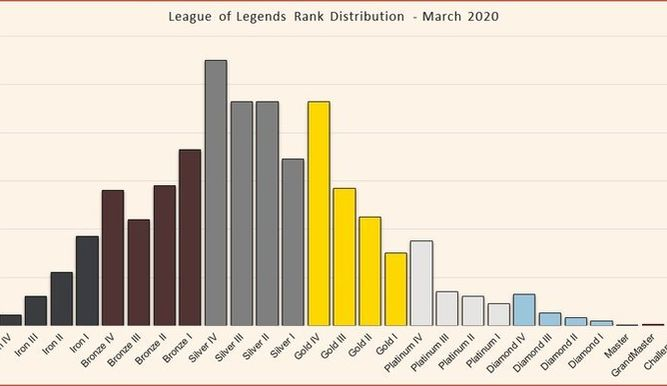

In [6]:
Image("resources/rank_dist.jpg")

In [7]:
# List of possible usernames
users = ['Edgar', 'Pablo', 'Gerardo', 'Diego', 'Mariana', 'Carolina', 'Catherine', 'Gabo', 'Ivan', 'Luisa', 'Nahibi']
# List of possible positions
lanes = ['top', 'jg', 'mid', 'adc', 'sup']
# Probability distribution function of the MMR of 100,000 online players 
mmr = 1350 + 320 * np.random.randn(100000)
# Probability distribution function of the Win Rate of 100,000 online players 
wr = 50 + 8 * np.random.randn(100000)

Text(0.5,1,'MMR Distribution of Players Online')

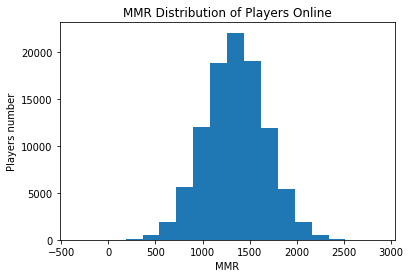

In [8]:
# Showing the histogram of the random generation MMR of online players
k = int(np.ceil(1+np.log2(100000)))
plt.hist(mmr, bins=k)
plt.xlabel('MMR')
plt.ylabel('Players number')
plt.title('MMR Distribution of Players Online')

Text(0.5,1,'Win Rate Distribution of Players Online')

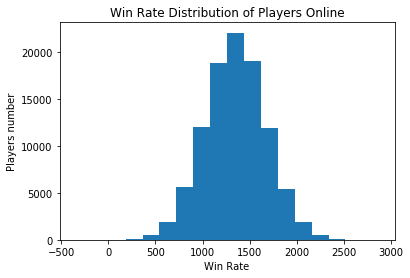

In [9]:
# Showing the histogram of the random generation Win Rate of online players
k = int(np.ceil(1+np.log2(100000)))
plt.hist(mmr, bins=k)
plt.xlabel('Win Rate')
plt.ylabel('Players number')
plt.title('Win Rate Distribution of Players Online')

In [10]:
# Function for generating random players following a normal distribution
def generate_rand_player():
    
    # Selecting a random element of the possible results generated randomly
    rand_mmr = round(np.random.choice(mmr), 2)
    rand_wr = round(np.random.choice(wr), 2)
    rand_rank = random.randint(1,4)
    rand_user = '{}{}{}'.format(np.random.choice(users), random.randint(0,9), random.randint(0,9))
    rand_level = random.randint(30, 550)
    rand_p_lane = np.random.choice(lanes)

    while(True):
        rand_s_lane = np.random.choice(lanes)
        if rand_p_lane != rand_s_lane:
            break
    
    # Creating a player with the choiced statistics based on the selected random MMR 
    if rand_mmr < 800:
        p = Player(rand_user, rand_level, rand_wr, 'Iron', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 800 <= rand_mmr < 1000:
        p = Player(rand_user, rand_level, rand_wr, 'Bronze', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1000 <= rand_mmr < 1200:
        p = Player(rand_user, rand_level, rand_wr, 'Silver', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1200 <= rand_mmr < 1500:
        p = Player(rand_user, rand_level, rand_wr, 'Gold', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1500 <= rand_mmr < 1800:
        p = Player(rand_user, rand_level, rand_wr, 'Platinum', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 1800 <= rand_mmr < 2200:
        p = Player(rand_user, rand_level, rand_wr, 'Diamond', rand_rank, True, rand_p_lane, rand_s_lane)
    elif 2200 <= rand_mmr < 2400:
        p = Player(rand_user, rand_level, rand_wr, 'Master', None, True, rand_p_lane, rand_s_lane)
    elif 2400 <= rand_mmr < 2600:
        p = Player(rand_user, rand_level, rand_wr, 'Grand Master', None, True, rand_p_lane, rand_s_lane)
    elif rand_mmr >= 2600:
        p = Player(rand_user, rand_level, rand_wr, 'Challenger', None, True, rand_p_lane, rand_s_lane)
    return p

In [11]:
# We will create a silver queue for inserting the players that are around the respective MMR
q = Queue('Silver')

# Generate 10,000 random players, the ones whose MMR is around silver will enter to the queue
for i in range(0,10000):
    p = generate_rand_player()
    if 1000 <= p.mmr < 1200:
        q.insert_end(p)

In [12]:
# Create two teams for a match
t1 = Team(1)
t2 = Team(2)

In [13]:
# The method form_team() takes the players in the queue based on the positions left for creating a team
q.form_team(t1)
q.form_team(t2)

In [15]:
# Finally, we create a match with the teams already formed
m = Match(1, t1, t2)
m.print_match_stats()
print(m)

Red Team

Diego57
Silver 2
Level 401
Win Rate: 40.46%
Primary lane: top
Secondary lane: sup

Carolina89
Silver 3
Level 189
Win Rate: 40.54%
Primary lane: mid
Secondary lane: adc

Mariana75
Silver 4
Level 137
Win Rate: 45.17%
Primary lane: jg
Secondary lane: top

Ivan70
Silver 4
Level 116
Win Rate: 60.16%
Primary lane: adc
Secondary lane: mid

Luisa69
Silver 2
Level 34
Win Rate: 44.72%
Primary lane: sup
Secondary lane: adc

Blue Team

Pablo83
Silver 4
Level 366
Win Rate: 50.31%
Primary lane: top
Secondary lane: sup

Carolina23
Silver 1
Level 369
Win Rate: 36.77%
Primary lane: mid
Secondary lane: top

Gabo35
Silver 2
Level 162
Win Rate: 33.98%
Primary lane: jg
Secondary lane: sup

Pablo12
Silver 1
Level 414
Win Rate: 46.52%
Primary lane: adc
Secondary lane: jg

Nahibi82
Bronze 2
Level 448
Win Rate: 59.07%
Primary lane: sup
Secondary lane: top


Red Team
Average MMR: 1092.2912000000001
top: Diego57
jg: Mariana75
mid: Carolina89
adc: Ivan70
sup: Luisa69

Blue Team
Average MMR: 1107.73632
t

We can see the matchmaking for a silver ranked solo duo game! 